# Pixel Shuffle

This notebook is a comparison between two best practices. Pixel shuffle and upsampling followed by a convolution.

## Imports

In [0]:
from fastai import *
from fastai.tabular import *
import pandas as pd
from torchsummary import summary
import torch
from torch import nn
import imageio
import torch
import glob
from fastai.vision import *
import os
from torch import nn
import torch.nn.functional as F

## Data

In [2]:
colab = True
if colab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount = True)
  %cp "/content/drive/My Drive/autoencoder-training/data.zip" .
  !unzip -q data.zip
  image_path = "data"
  %cp "/content/drive/My Drive/autoencoder-training/model_layers.py" .
  %cp "/content/drive/My Drive/autoencoder-training/baseline_model.py" .
  %cp "/content/drive/My Drive/autoencoder-training/pixelShuffle_model.py" .
  import pixelShuffle_model
else: 
  os.chdir("../")
  image_path = os.getcwd() + "/data"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
np.random.seed(3333)
torch.manual_seed(3333)

size = 32
batchsize = 128

#tfms = get_transforms(do_flip = True)
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0, 
                      p_lighting=0.75)
src = (ImageImageList.from_folder(image_path).split_by_folder().label_from_func(lambda x: x))
data = (src.transform(tfms, size=size, tfm_y=True)
        .databunch(bs=batchsize)
        .normalize(imagenet_stats, do_y = False))

## Model

In [0]:
autoencoder = pixelShuffle_model.autoencoder()

In [0]:
learn = Learner(data, autoencoder, loss_func = F.mse_loss)

In [6]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,0.035999,0.028541,01:51
1,0.007871,0.009025,01:50
2,0.005665,0.007075,01:49
3,0.004640,0.005998,01:48
4,0.004307,0.005717,01:48


In [7]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07
Min loss divided by 10: 2.75E-07


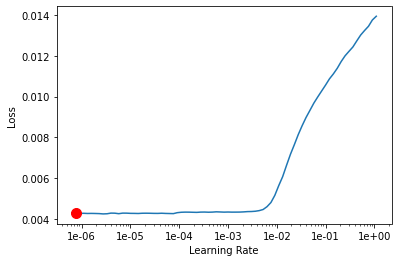

In [8]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.metrics = [mean_squared_error, mean_absolute_error, r2_score, explained_variance]

In [10]:
learn.fit_one_cycle(10, max_lr = 1e-03)

epoch,train_loss,valid_loss,mean_squared_error,mean_absolute_error,r2_score,explained_variance,time
0,0.004235,0.005701,0.005701,0.053605,0.907048,0.907317,01:48
1,0.004192,0.005782,0.005782,0.054526,0.905707,0.907028,01:48
2,0.004074,0.005579,0.005579,0.053472,0.909020,0.909903,01:48
3,0.003865,0.005267,0.005267,0.051981,0.914068,0.914112,01:49
4,0.003712,0.005085,0.005085,0.050652,0.917046,0.917080,01:48
5,0.003578,0.004832,0.004832,0.049338,0.921156,0.921287,01:49
6,0.003329,0.004613,0.004613,0.048055,0.924737,0.924940,01:48
7,0.003209,0.004483,0.004483,0.047294,0.926854,0.926976,01:48
8,0.003111,0.004407,0.004407,0.046780,0.928106,0.928197,01:48
9,0.003105,0.004385,0.004385,0.046642,0.928460,0.928483,01:46


## Results

### Training

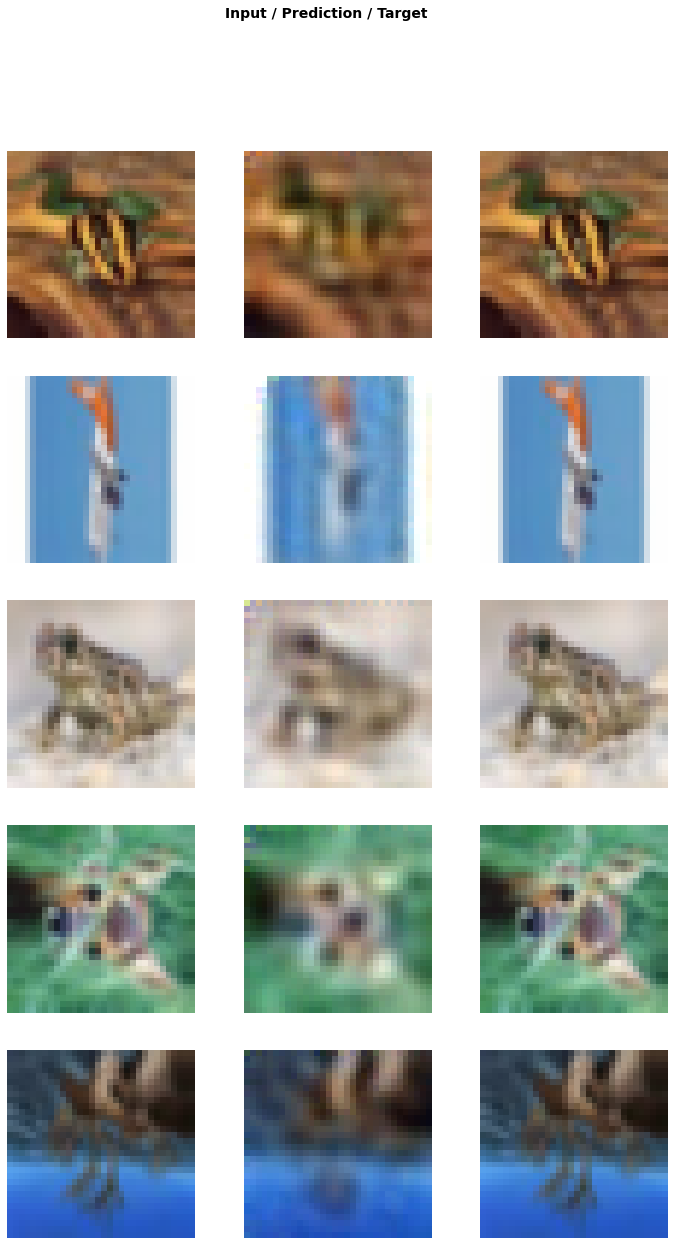

In [11]:
learn.show_results(ds_type=DatasetType.Train)

### Validation

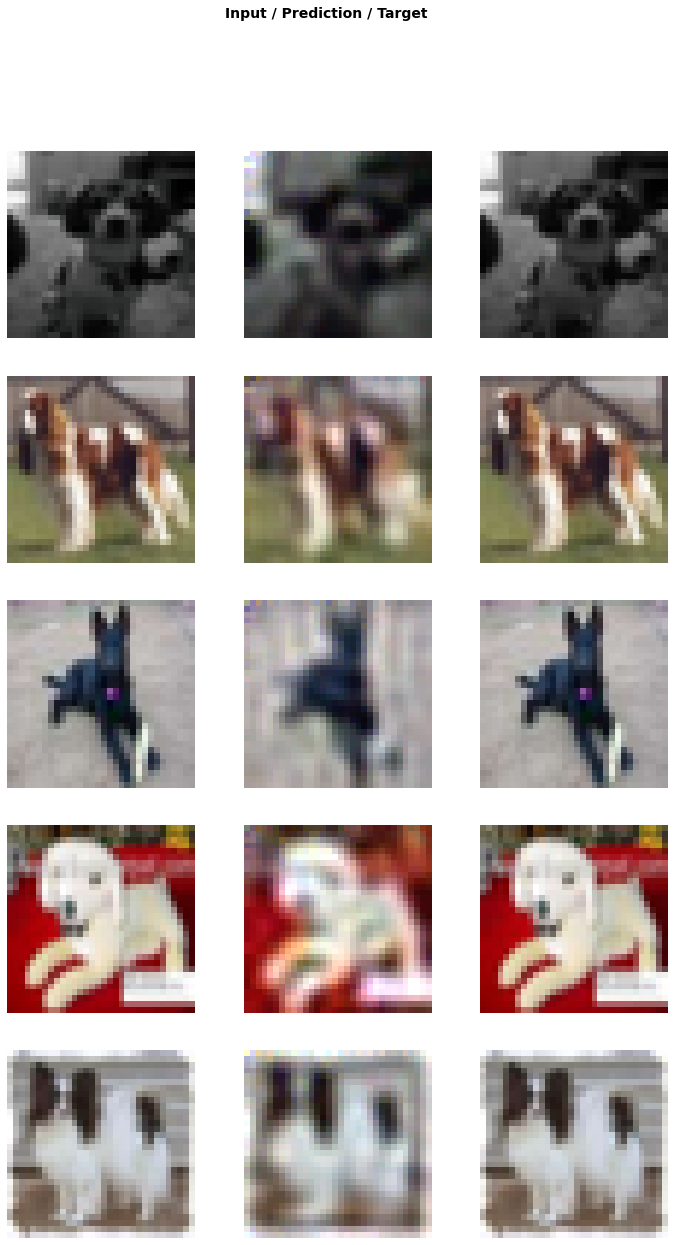

In [12]:
learn.show_results(ds_type=DatasetType.Valid)

In [0]:
torch.save(autoencoder, "/content/drive/My Drive/autoencoder-training/pixelShuffle-Cifar10.pt")